# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import pandas as pd

cast = pd.read_csv('cast.csv')
release_dates = pd.read_csv('release_dates.csv')
titles = pd.read_csv('titles.csv')

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [11]:
# Basic info for each dataset
print("---- CAST ----")
print(cast.info(), "\n")

print("---- RELEASE DATES ----")
print(release_dates.info(), "\n")

print("---- TITLES ----")
print(titles.info(), "\n")

# Quick look at row counts and missing values
print("CAST shape:", cast.shape)
print("RELEASE_DATES shape:", release_dates.shape)
print("TITLES shape:", titles.shape)

print("\nMissing values per file:")
print("CAST:\n", cast.isna().sum())
print("\nRELEASE DATES:\n", release_dates.isna().sum())
print("\nTITLES:\n", titles.isna().sum())

# Display a few rows to get a sense of data
display(cast.head(), release_dates.head(), titles.head())


---- CAST ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None 

---- RELEASE DATES ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB
None 

---- TITLES ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  -------------

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


#### Summary of Findings 

Cast

- Contains 3,442,902 records and 6 columns (title, year, name, type, character, n)

- Each row represents one cast member’s role in a movie

- Data types include mostly text (object), with numeric columns year (int) and n (float)

- There are some missing values especially in the n column (≈1.3 million missing entries) and a few in character and title

- Sample data shows actor names, roles, and characters linked to each title and year

Release dates

- Contains 443,486 records and 4 columns (title, year, country, date)

- Each row represents a release event (one film released in one country)

- Only 1 missing title out of all records — otherwise data is very complete

- date is stored as a string (object), which will likely need to be converted to datetime for analysis

- Covers many countries and release years from early cinema to modern years

Titles

- Contains 226,013 records and 2 columns (title, year)

- Represents unique movie titles with their corresponding release year

- Only 1 missing title observed; otherwise data is mostly clean

### 2. How many movies have the title North by Northwest

In [26]:
north_by_northwest = titles[titles['title'] == 'North by Northwest']

count_nbn = north_by_northwest.shape[0]
print(f"Number of movies titled 'North by Northwest': {count_nbn}")

north_by_northwest

Number of movies titled 'North by Northwest': 1


,title,year
201761,North by Northwest,1959


### 3. How many version of Hamlet are there, when was the first made? the last?

In [28]:
hamlet_versions = titles[titles['title'].str.contains('Hamlet', case=False, na=False)]

num_hamlets = hamlet_versions.shape[0]

# Find the earliest and latest release years
first_year = hamlet_versions['year'].min()
last_year = hamlet_versions['year'].max()

print(f"Number of movies with 'Hamlet' in the title: {num_hamlets}")
print(f"First version released in: {first_year}")
print(f"Most recent version released in: {last_year}")

hamlet_versions.sort_values('year').head(10)


Number of movies with 'Hamlet' in the title: 55
First version released in: 1910
Most recent version released in: 2018


,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
150955,A Sagebrush Hamlet,1919
221419,Hamlet,1921
54760,"Han, hun og Hamlet",1922
161129,"Han, hun og Hamlet",1932
221201,Hamlet,1948
220568,Hamlet,1954
132525,Hamlet (II),1964


### 4. List all the movies called Treasure Island from oldest to newest

In [31]:
treasure_island = titles[titles['title'].str.lower() == 'treasure island']

treasure_island_sorted = treasure_island.sort_values('year', ascending=True)

print(f"Number of movies titled 'Treasure Island': {treasure_island_sorted.shape[0]}")
treasure_island_sorted

Number of movies titled 'Treasure Island': 8


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

Movies released in selected years:
year
1950    1109
1980    1750
2000    2568
Name: count, dtype: int64


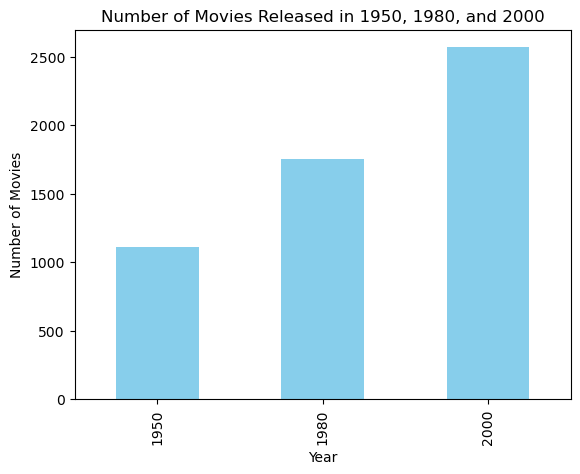

In [35]:
years_of_interest = [1950, 1980, 2000]

movies_per_year = titles[titles['year'].isin(years_of_interest)]['year'].value_counts().sort_index()

print("Movies released in selected years:")
print(movies_per_year)

import matplotlib.pyplot as plt

movies_per_year.plot(kind='bar', color='skyblue', title='Number of Movies Released in 1950, 1980, and 2000')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

The number of movies produced increased significantly over time — from relatively few films in 1950 to a much larger number by 2000

This pattern reflects:

- Growth of the global film industry and new production markets outside Hollywood

- Advances in technology, making filmmaking more accessible

- Expansion of film festivals, studios, and streaming platforms in the late 20th century

- Overall, the data suggests a steady upward trend in movie production volume throughout the decades

### 6. How big was the cast of Metropolis


In [38]:
metropolis_cast = cast[cast['title'] == 'Metropolis']

cast_size = metropolis_cast.shape[0]
print(f"Number of cast members in 'Metropolis': {cast_size}")

metropolis_cast.head()


Number of cast members in 'Metropolis': 33


,title,year,name,type,character,n
3416,Metropolis,1927,Alfred Abel,actor,Joh Fredersen,1.0
26389,Metropolis,1927,Fritz Alberti,actor,Creative Human - Man who Convinces Babel,NaN
193089,Metropolis,1927,Erwin Biswanger,actor,11811 - Georgy,6.0
542995,Metropolis,1927,Max Dietze,actor,Working Man,NaN
709318,Metropolis,1927,Gustav Fröhlich,actor,Freder - Joh Fredersen's Son,2.0


### 7. How many roles for actors were there 1950's? 1990's

In [41]:
actors = cast[cast['type'] == 'actor']

roles_1950s = actors[(actors['year'] >= 1950) & (actors['year'] <= 1959)]
roles_1990s = actors[(actors['year'] >= 1990) & (actors['year'] <= 1999)]

count_1950s = roles_1950s.shape[0]
count_1990s = roles_1990s.shape[0]

print(f"Number of actor roles in the 1950s: {count_1950s}")
print(f"Number of actor roles in the 1990s: {count_1990s}")

Number of actor roles in the 1950s: 153559
Number of actor roles in the 1990s: 245713


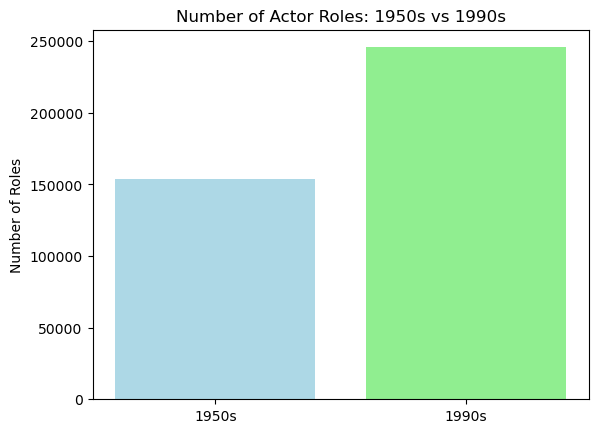

In [43]:
import matplotlib.pyplot as plt

plt.bar(['1950s', '1990s'], [count_1950s, count_1990s], color=['lightblue', 'lightgreen'])
plt.title('Number of Actor Roles: 1950s vs 1990s')
plt.ylabel('Number of Roles')
plt.show()

### 8. How many roles for actors & actresses over time? Output should be a line graph

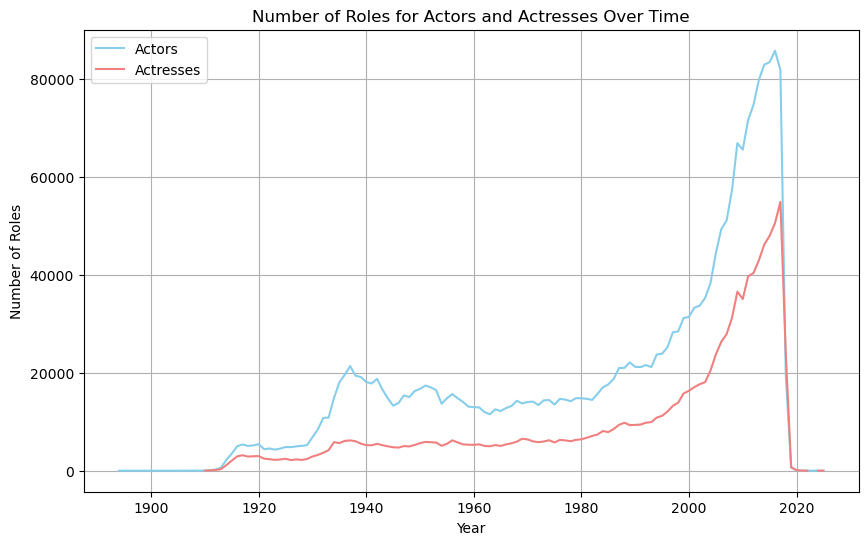

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

roles_over_time = (
    cast[cast['type'].isin(['actor', 'actress'])]
    .groupby(['year', 'type'])
    .size()
    .reset_index(name='count')
)

roles_pivot = roles_over_time.pivot(index='year', columns='type', values='count')

roles_pivot = roles_pivot[roles_pivot.index <= 2025]

plt.figure(figsize=(10,6))
plt.plot(roles_pivot.index, roles_pivot['actor'], label='Actors', color='skyblue')
plt.plot(roles_pivot.index, roles_pivot['actress'], label='Actresses', color='lightcoral')

plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [47]:
roles_2000s = cast[(cast['year'] >= 2000) & (cast['year'] <= 2009)]

leading_roles_2000s = roles_2000s[roles_2000s['n'] == 1]

num_leading_roles = leading_roles_2000s.shape[0]
print(f"Number of leading roles in the 2000s: {num_leading_roles}")

Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [49]:
import pandas as pd

no_rank = cast[cast['n'].isna()]

no_rank_1950s = no_rank[(no_rank['year'] >= 1950) & (no_rank['year'] <= 1959)]
no_rank_2000s = no_rank[(no_rank['year'] >= 2000) & (no_rank['year'] <= 2009)]

count_1950s = no_rank_1950s.shape[0]
count_2000s = no_rank_2000s.shape[0]

print(f"Number of roles with no ranking in the 1950s: {count_1950s}")
print(f"Number of roles with no ranking in the 2000s: {count_2000s}")


Number of roles with no ranking in the 1950s: 95406
Number of roles with no ranking in the 2000s: 232037


- The number of unranked roles more than doubled from the 1950s to the 2000s

- This increase reflects how the film industry grew dramatically by the 2000s, there were far more productions, background roles, and minor credits

- It also suggests that data recording practices changed: modern databases include many uncredited extras or incomplete cast listings, whereas older records typically listed only principal cast

- We can conclude that the jump from ~95k to ~232k unranked roles shows both the expansion of movie production and broader inclusion of all cast members (even those without formal billing) in modern IMDb data

### 11. Plot the number of films made in each decade

decade
1890        3
1900       39
1910     6752
1920     8954
1930    10245
1940     8561
1950    12664
1960    17419
1970    18476
1980    19532
1990    21547
2000    35730
2010    65830
2020      260
2110        1
Name: count, dtype: int64


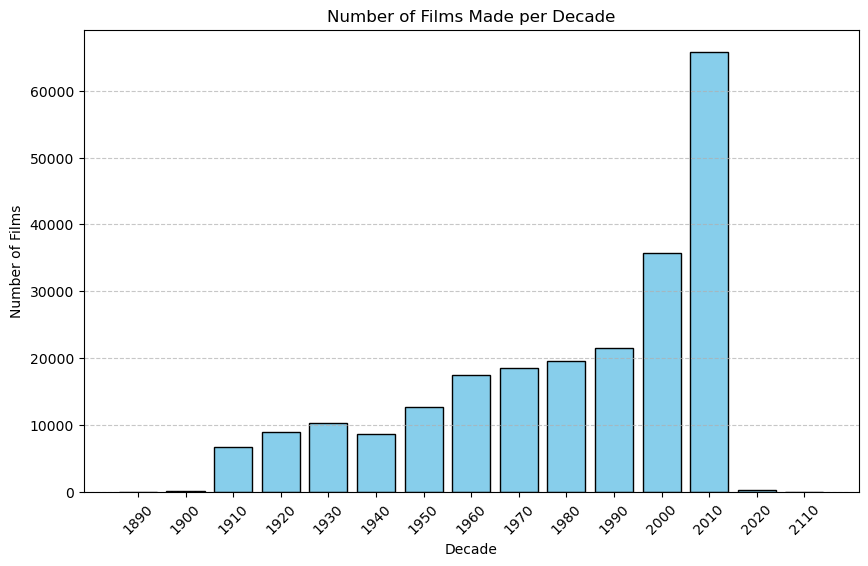

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

titles['decade'] = (titles['year'] // 10) * 10

films_per_decade = titles['decade'].value_counts().sort_index()

print(films_per_decade)

plt.figure(figsize=(10,6))
plt.bar(films_per_decade.index.astype(str), films_per_decade.values, color='skyblue', edgecolor='black')

plt.title('Number of Films Made per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 12. Plot the number of films with a Rustler character over time

,year,num_films
0,1919,1
1,1926,1
2,1928,2
3,1929,3
4,1930,1


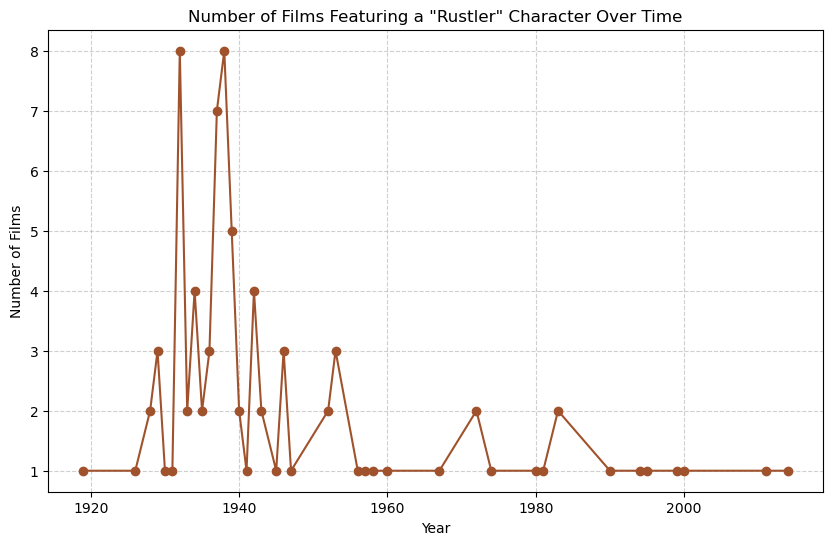

In [54]:
rustler_roles = cast[cast['character'].str.contains('Rustler', case=False, na=False)]

rustler_by_year = rustler_roles.groupby('year')['title'].nunique().reset_index(name='num_films')

rustler_by_year = rustler_by_year[rustler_by_year['year'] <= 2025]

display(rustler_by_year.head())

plt.figure(figsize=(10,6))
plt.plot(rustler_by_year['year'], rustler_by_year['num_films'], marker='o', color='sienna')

plt.title('Number of Films Featuring a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 13. What are the top ten character names of all time?

In [56]:

top_characters = (
    cast['character']
    .dropna()                      # remove missing values
    .value_counts()                # count occurrences
    .head(10)                      # top 10
)

# Display the top ten character names
print("Top 10 Character Names of All Time:")
print(top_characters)


Top 10 Character Names of All Time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [58]:

cast_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

actor_counts_1990s = (
    cast_1990s[cast_1990s['type'] == 'actor']['name']
    .value_counts()
)

top_actor_1990s = actor_counts_1990s.head(1)
print("Actor with the most film appearances in the 1990s:")
print(top_actor_1990s)


Actor with the most film appearances in the 1990s:
name
Shakti Kapoor    143
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [60]:
science_roles = cast[cast['character'].str.startswith('Science', na=False)]

top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 Roles Starting with 'Science':")
print(top_science_roles)

Top 10 Roles Starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [62]:

cast_size = cast.groupby(['title', 'year']).size().reset_index(name='num_cast')

largest_cast = cast_size.sort_values('num_cast', ascending=False).head(1)

print("Film with the Largest Cast:")
display(largest_cast)


Film with the Largest Cast:


,title,year,num_cast
12037,Around the World in 80 Days,1956,1299


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [64]:
cast_size = cast.groupby(['title', 'year']).size().reset_index(name='num_cast')


stats = cast_size['num_cast'].describe()

print("Descriptive Statistics for Cast Size:")
print(stats)

Descriptive Statistics for Cast Size:
count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
Name: num_cast, dtype: float64


### 18. How many films has Natalie Portman been in in each year throughout her career?

,year,num_films
0,1995,1
1,1996,3
2,1999,2
3,2000,1
4,2001,1
5,2002,1
6,2003,1
7,2004,2
8,2005,4
9,2006,1


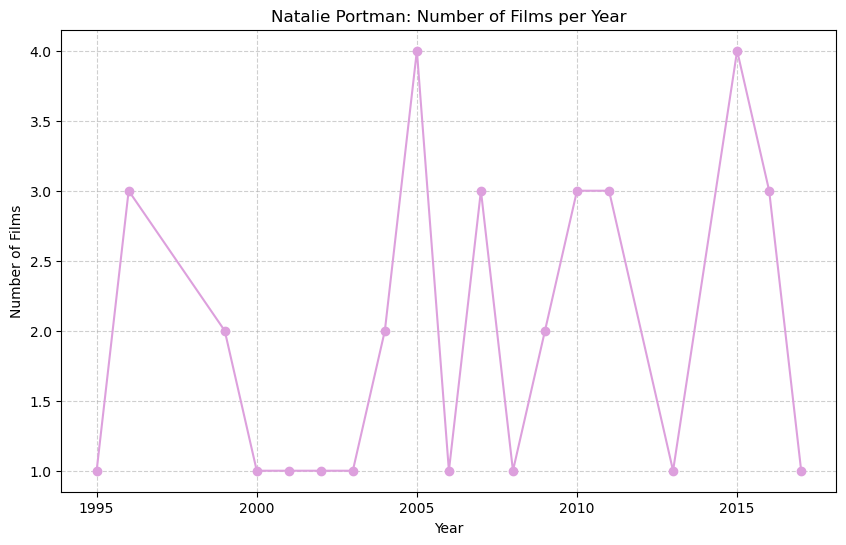

In [66]:

natalie = cast[cast['name'] == 'Natalie Portman']


natalie_per_year = (
    natalie.groupby('year')['title']
    .nunique()
    .reset_index(name='num_films')
    .sort_values('year')
)

display(natalie_per_year)

plt.figure(figsize=(10,6))
plt.plot(natalie_per_year['year'], natalie_per_year['num_films'],
         marker='o', linestyle='-', color='plum')
plt.title("Natalie Portman: Number of Films per Year")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

,year,num_films
0,1999,1
1,2000,1
2,2002,1
3,2005,3
4,2006,1
5,2007,1
6,2008,1
7,2009,1
8,2010,1
9,2011,2


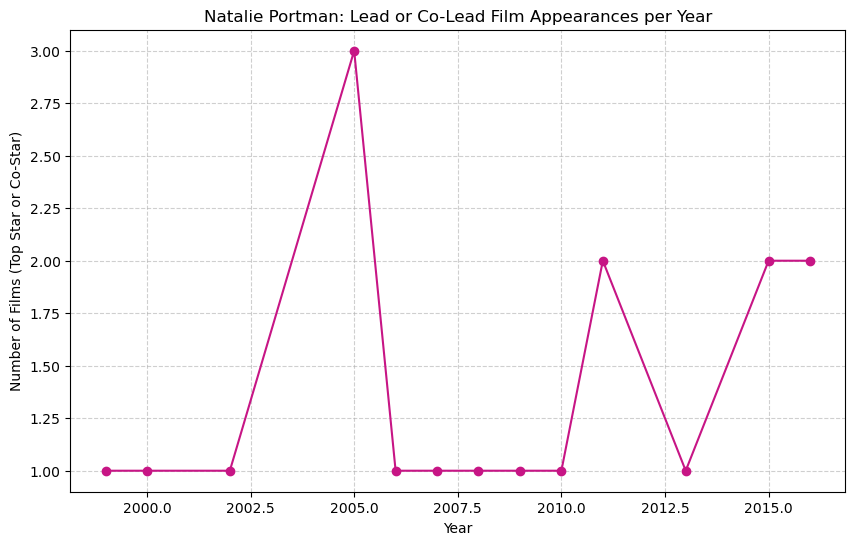

In [69]:

natalie_lead = cast[(cast['name'] == 'Natalie Portman') & (cast['n'].isin([1, 2]))]

natalie_lead_per_year = (
    natalie_lead.groupby('year')['title']
    .nunique()
    .reset_index(name='num_films')
    .sort_values('year')
)

display(natalie_lead_per_year)

plt.figure(figsize=(10,6))
plt.plot(natalie_lead_per_year['year'], natalie_lead_per_year['num_films'],
         marker='o', linestyle='-', color='mediumvioletred')
plt.title("Natalie Portman: Lead or Co-Lead Film Appearances per Year")
plt.xlabel("Year")
plt.ylabel("Number of Films (Top Star or Co-Star)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### 20. Determine how many roles for actor or actress by decade. Plot the output 

In [71]:

actors_actresses = cast[cast['type'].isin(['actor', 'actress'])].copy()

actors_actresses['decade'] = (actors_actresses['year'] // 10) * 10

roles_by_decade = (
    actors_actresses
    .groupby(['decade', 'type'])
    .size()
    .reset_index(name='num_roles')
)

roles_pivot = roles_by_decade.pivot(index='decade', columns='type', values='num_roles')

roles_pivot = roles_pivot[roles_pivot.index <= 2020]

# Display results
display(roles_pivot)


type,actor,actress
decade,,
1890,2,1
1900,54,16
1910,27396,15733
1920,48112,23826
1930,149272,49298
1940,159799,50871
1950,153559,56331
1960,128132,54484
1970,142015,60977


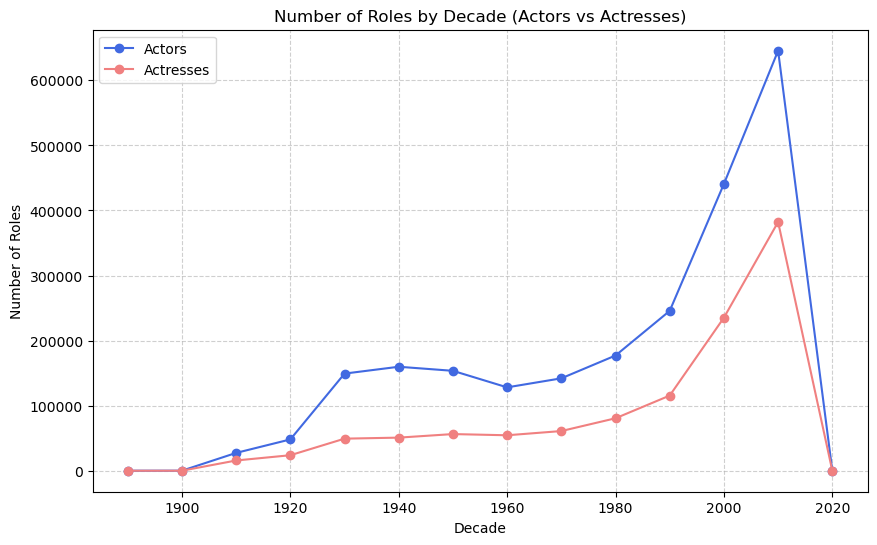

In [73]:
plt.figure(figsize=(10,6))
plt.plot(roles_pivot.index, roles_pivot['actor'], marker='o', color='royalblue', label='Actors')
plt.plot(roles_pivot.index, roles_pivot['actress'], marker='o', color='lightcoral', label='Actresses')

plt.title('Number of Roles by Decade (Actors vs Actresses)')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

release = release_dates.copy()

release['date'] = pd.to_datetime(release['date'], errors='coerce')

release = release.dropna(subset=['date'])

release['day_of_week'] = release['date'].dt.day_name()
release['month'] = release['date'].dt.month_name()

release_pivot = pd.pivot_table(
    release,
    index='day_of_week',
    columns='month',
    values='title',
    aggfunc='count',
    fill_value=0
)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
release_pivot = release_pivot.reindex(days_order)

# Display pivot table
display(release_pivot)

month,April,August,December,February,January,July,June,March,May,November,October,September
day_of_week,,,,,,,,,,,,
Monday,3168,2844,3240,3138,3699,2267,2337,3383,3050,3372,3551,3161
Tuesday,1446,1121,1903,1190,1823,1144,1179,1313,1377,1415,1542,1309
Wednesday,4650,4270,5097,4118,4663,4243,4282,4479,4289,4582,4605,4161
Thursday,10625,9931,10666,10356,10746,8947,9469,11844,10100,10859,11490,10713
Friday,13559,13430,13020,13833,13734,11635,11997,15268,13198,14084,14893,14523
Saturday,2868,2277,3357,2395,2925,2291,2409,2742,2270,2546,2700,2551
Sunday,1358,1138,1813,1277,1822,894,1031,1228,1165,1342,1423,1332


Conclusion:

The data confirms strong seasonal and weekday-based strategies in the film industry:

- Friday is the universal release day across markets

- Summer and holiday months dominate release schedules

- These trends reflect how studios time releases for maximum audience availability and profitability, capitalizing on weekends, vacations, and holidays

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

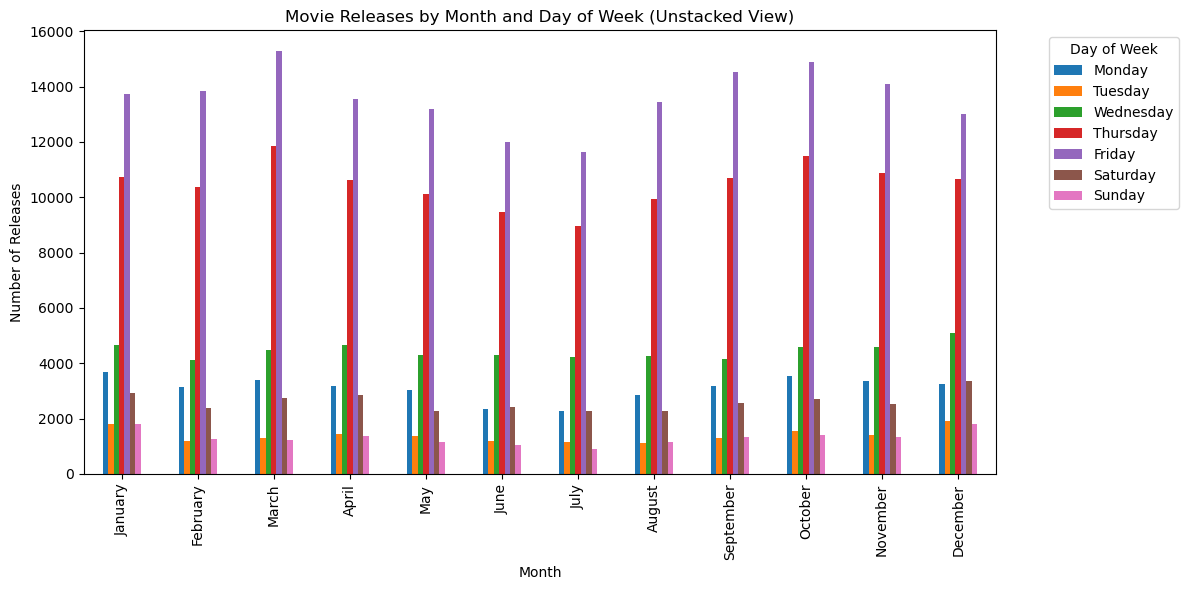

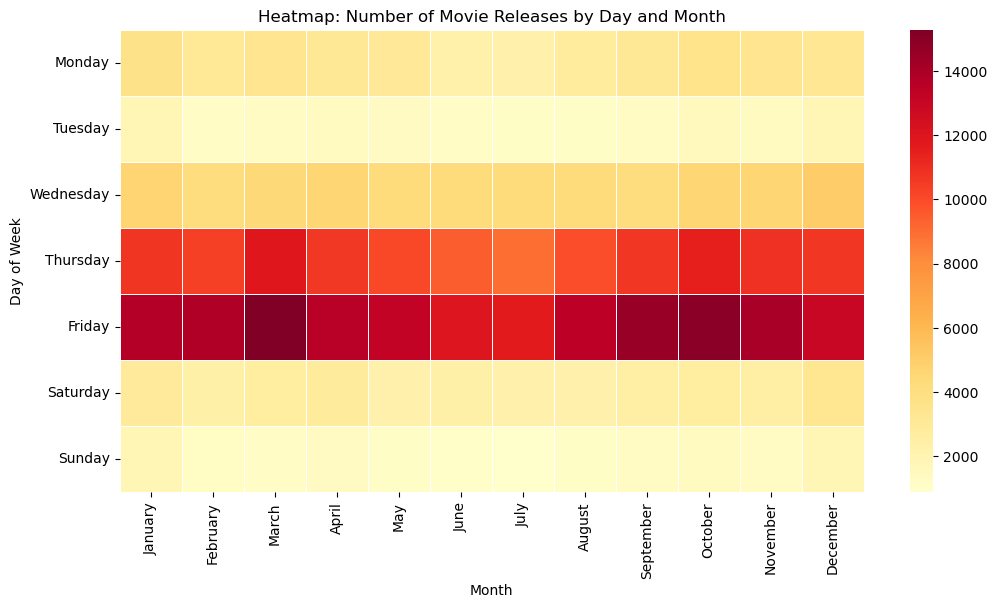

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
release_pivot = release_pivot[month_order]  # reorder columns

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
release_pivot = release_pivot.reindex(day_order)

# --- Quick bar chart version ---
release_pivot.T.plot(kind='bar', figsize=(12,6))
plt.title('Movie Releases by Month and Day of Week (Unstacked View)')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Better visualization: Heatmap ---
plt.figure(figsize=(12,6))
sns.heatmap(release_pivot, cmap='YlOrRd', linewidths=0.5, annot=False)
plt.title('Heatmap: Number of Movie Releases by Day and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [82]:
import pandas as pd

star_wars_cast = cast[cast['title'].str.contains('Star Wars', case=False, na=False)]

star_wars_actors = star_wars_cast['name'].unique()

print(f"Number of unique actors from Star Wars: {len(star_wars_actors)}")

films_with_sw_actors = cast[
    (cast['name'].isin(star_wars_actors)) &
    (~cast['title'].str.contains('Star Wars', case=False, na=False))
]

films_by_actor = films_with_sw_actors.groupby('name')['title'].unique()

for actor, films in films_by_actor.head(5).items():
    print(f"\n {actor}:")
    print(", ".join(films[:10]))  # show up to 10 titles per actor


Number of unique actors from Star Wars: 944

 Aaron (IV) Kennedy:
One Square Mile, Run All Night

 Adam Bareham:
Wilt

 Adam Driver:
Bluebird, Frances Ha, Gayby, Hungry Hearts, Inside Llewyn Davis, J. Edgar, Lincoln, Logan Lucky, Midnight Special, Not Waving But Drowning

 Adrian Allan:
Acquainted, Bridget Jones: The Edge of Reason, Furious 6, Guardians of the Galaxy, Mamma Mia!

 Ahmed Best:
FDR: American Badass!, Lean on Me, Mother and Child, Open Window, Poolboy: Drowning Out the Fury, W.M.D.
